# Medical Insurance Project

First, let's import, then inspect the data. 

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('insurance.csv')

print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


Next, let's analyze some general statistics. 

# General Statistics

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64


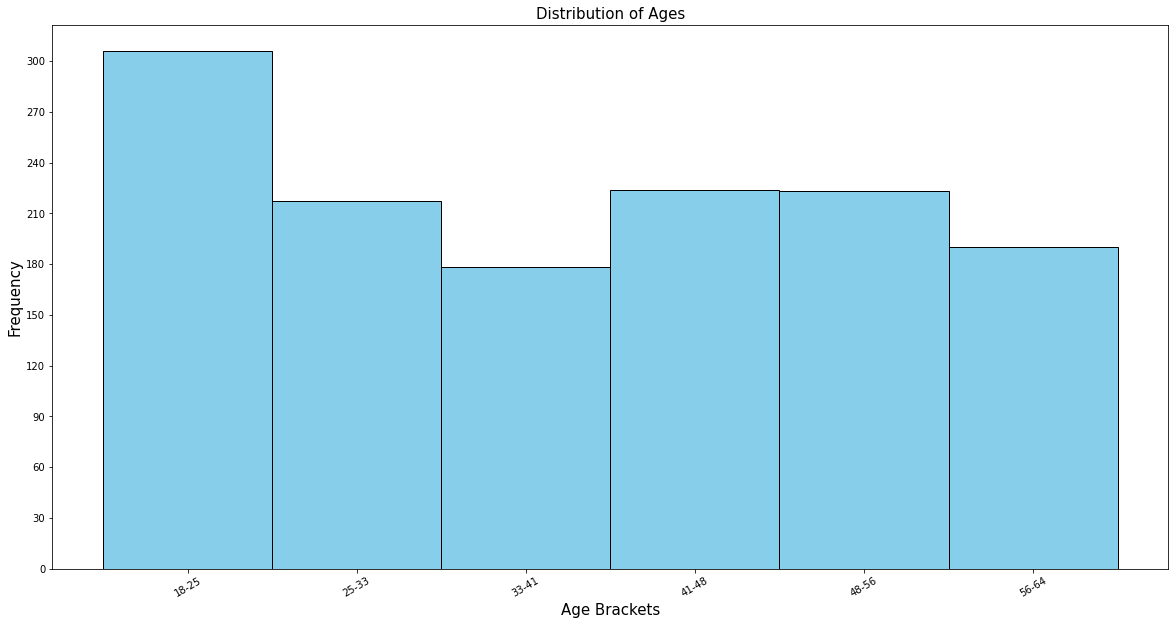

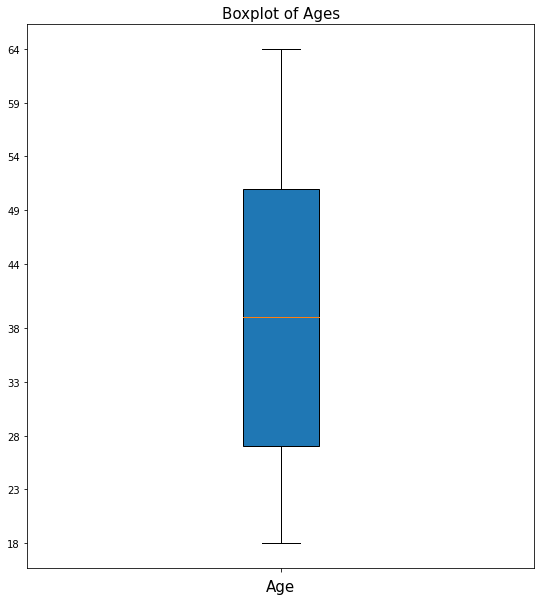

<Figure size 1440x720 with 0 Axes>

In [21]:
print(df['age'].describe())

ax1=plt.subplot()

plt.rcParams['figure.figsize']=(20,10)
plt.hist(df['age'],histtype='bar',color='skyblue',bins=6,edgecolor='black')
plt.xlabel('Age Brackets',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of Ages',fontsize=15)

m=df.age.min()
M=df.age.max()
X=np.arange(m,M,(M-m)/6)
mid=[]
L=[]

for i in range(len(X)-1):
    mid.append((X[i]+X[i+1])/2)
mid.append((X[-1]+M)/2)

for i in range(len(X)-1):
    L.append(str(int(X[i]))+'-'+str(int(X[i+1])))
L.append(str(int(X[-1]))+'-'+str(int(M)))

ax1.set_xticks(mid)
ax1.set_xticklabels(L)
plt.xticks(rotation=30)

Y=np.arange(0,330,300/10)
ax1.set_yticks(Y)

plt.show()
plt.clf()


plt.rcParams['figure.figsize']=(20,10)
ax2=plt.subplot(1,2,2)
YY=np.linspace(m,M,10)
YY=[np.round(y) for y in YY]
plt.boxplot(df['age'], patch_artist=True)
plt.xlabel('Age',fontsize=15)
ax2.set_yticks(YY)
ax2.set_xticklabels('')
plt.title('Boxplot of Ages',fontsize=15)
plt.show()
plt.clf()

Now, let's see how the genders are distributed.

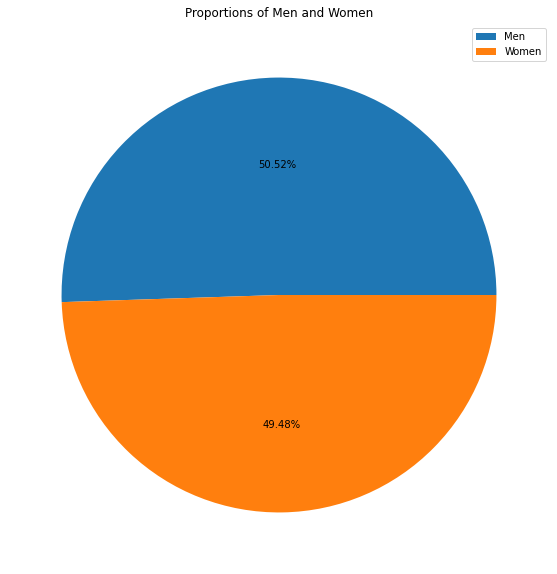

In [22]:
props_gender=df['sex'].value_counts()/len(df)
plt.pie(props_gender,autopct="%.2f%%")
plt.legend(['Men','Women'])
plt.title('Proportions of Men and Women')
plt.axis()
plt.rcParams['figure.figsize']=(15,8)
plt.show()

From the pie chart above, we see that our sample population is roughly half men and half women. Similarly, we can do a similar analysis for the proportions of smokers and non-smokers.

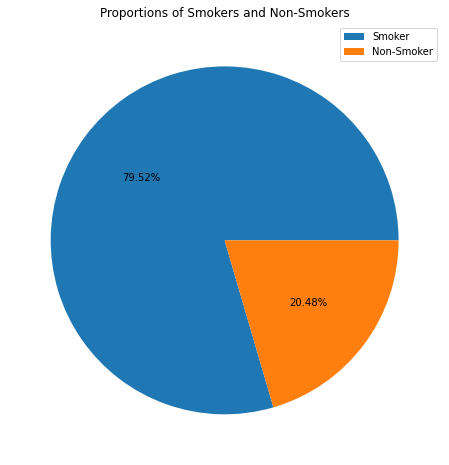

In [23]:
props_smokers=df['smoker'].value_counts()/len(df)
plt.pie(props_smokers,autopct="%.2f%%")
plt.legend(['Smoker','Non-Smoker'])
plt.title('Proportions of Smokers and Non-Smokers')
plt.axis()
plt.rcParams['figure.figsize']=(20,10)
plt.show()

From this, we see that most of our sample, almost 80 percent, are smokers. But what about their BMI's? 

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64


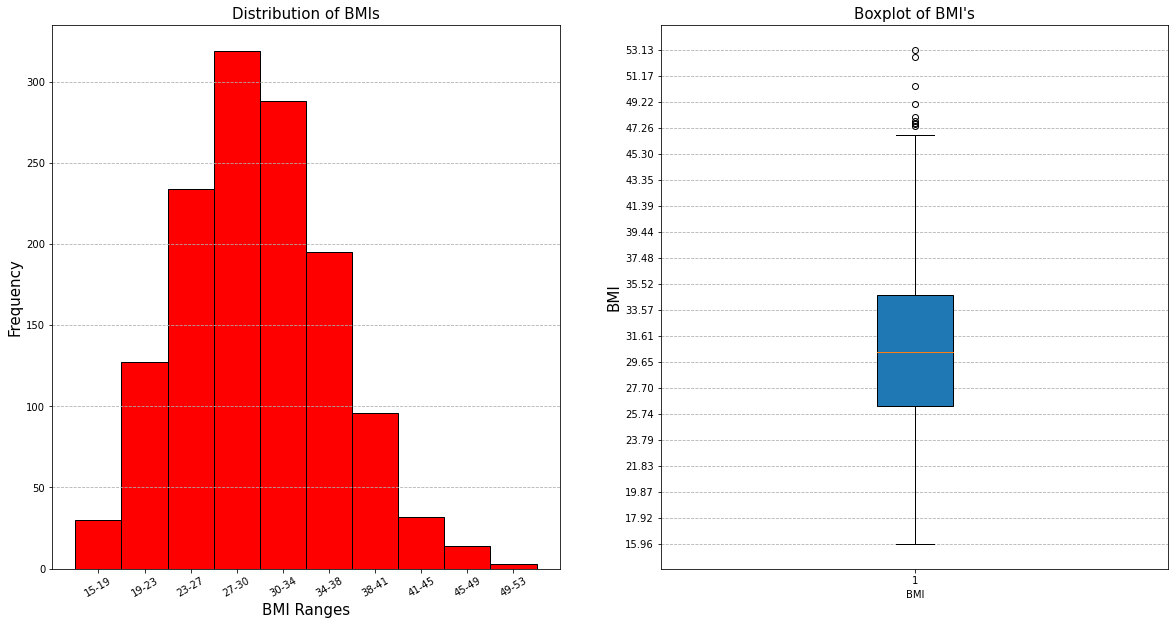

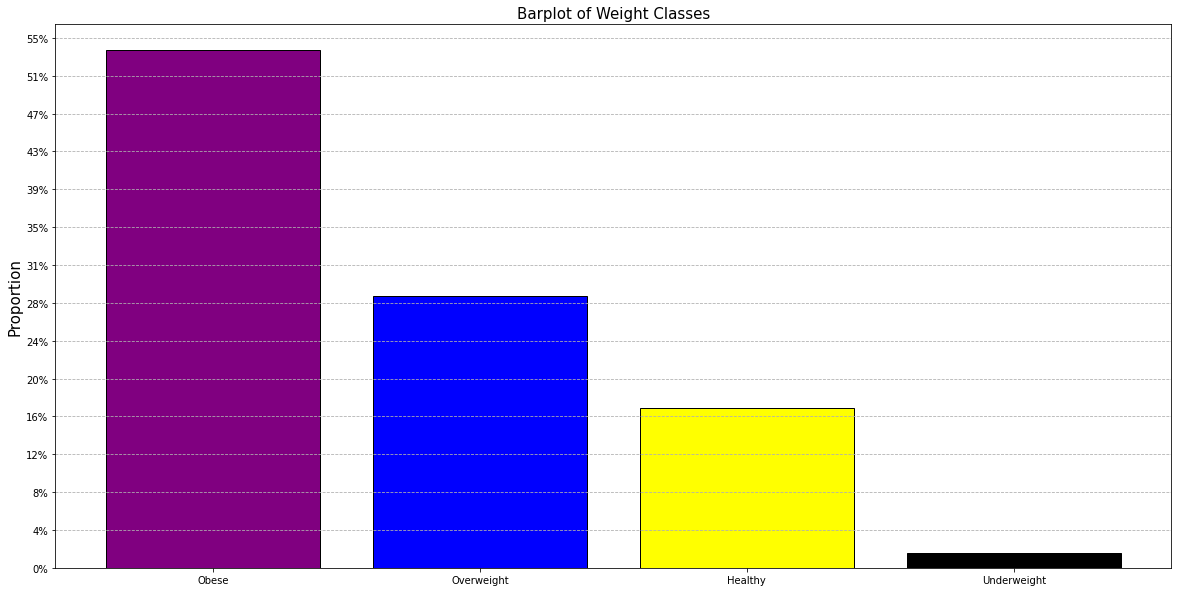

In [24]:
print(df['bmi'].describe())
ax1=plt.subplot(1,2,1)
plt.hist(df['bmi'],histtype='bar',color='red',edgecolor='black')
plt.title('Distribution of BMIs',fontsize=15)
plt.xlabel('BMI Ranges',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.grid(axis='y',linestyle='--')

m=df.bmi.min()
M=df.bmi.max()
X=np.arange(m,M,(M-m)/10)
mid=[]
L=[]

for i in range(len(X)-1):
    mid.append((X[i]+X[i+1])/2)
mid.append((X[-1]+M)/2)

for i in range(len(X)-1):
    L.append(str(int(X[i]))+'-'+str(int(X[i+1])))
L.append(str(int(X[-1]))+'-'+str(int(M)))

ax1.set_xticks(mid)
ax1.set_xticklabels(L)
plt.xticks(rotation=30)


ax2=plt.subplot(1,2,2)
plt.boxplot(df['bmi'],patch_artist=True)
plt.title("Boxplot of BMI's",fontsize=15)
plt.xlabel("BMI")
plt.ylabel('BMI',fontsize=15)
plt.grid(axis='y',linestyle='--')

Y=np.linspace(m,M,20)
ax2.set_yticks(Y)

plt.show()
plt.clf()

fig=plt.subplot()
def weight_class(bmi):
    if bmi<18.5:
        return 'underweight'
    elif (bmi>=18.5) & (bmi<=24.9):
        return 'healthy'
    elif (bmi>=25) & (bmi<=29.9):
        return 'overweight'
    else:
        return 'obese'
    
df['weight_class']=df.bmi.apply(weight_class)

props_weight = df['weight_class'].value_counts()/len(df)

plt.bar(['Obese','Overweight','Healthy','Underweight'],props_weight,color=['Purple','Blue','Yellow','Black'],edgecolor='black')
plt.title('Barplot of Weight Classes',fontsize=15)
plt.ylabel('Proportion', fontsize=15)
plt.grid(axis='y',linestyle='--')

YY=np.linspace(0.0,0.55,15)
fig.set_yticks(YY)

L=[]
for y in YY:
    l=round(100*y)
    L.append(str(l)+'%')

fig.set_yticklabels(L)

plt.show()

Now, that we've analyzed the BMI in a general sense, let's move on to the 'children' column.

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


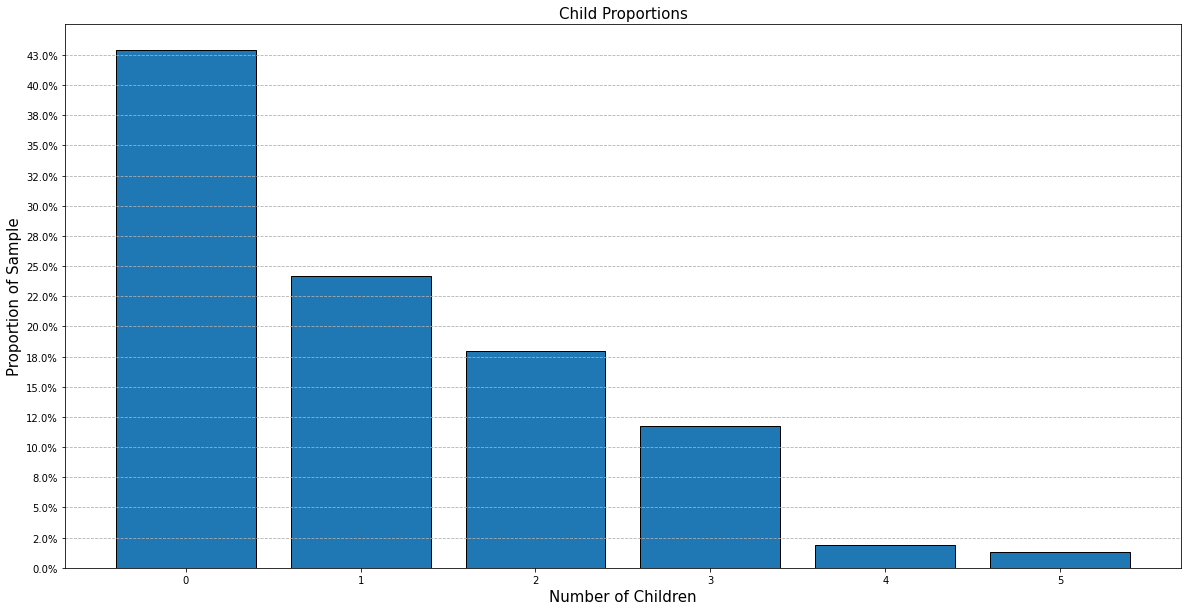

<Figure size 1440x720 with 0 Axes>

In [25]:
print(df['children'].describe())
print(df['children'].value_counts())

ax=plt.subplot()
plt.bar([0,1,2,3,4,5],df['children'].value_counts()/len(df),edgecolor='black')
plt.xlabel('Number of Children',fontsize=15)
plt.ylabel('Proportion of Sample',fontsize=15)
plt.title('Child Proportions',fontsize=15)
plt.grid(axis='y',which='major',linestyle='--')

ticks=np.arange(0,0.45,0.025)
labels=[]

for tick in ticks:
    labels.append(str(np.round(tick*100))+'%')
    
ax.set_yticks(ticks)
ax.set_yticklabels(labels)
    

plt.show()
plt.clf()


Now that we've analyzed the children column, in a broad sense, let's move on to the region column. 

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64


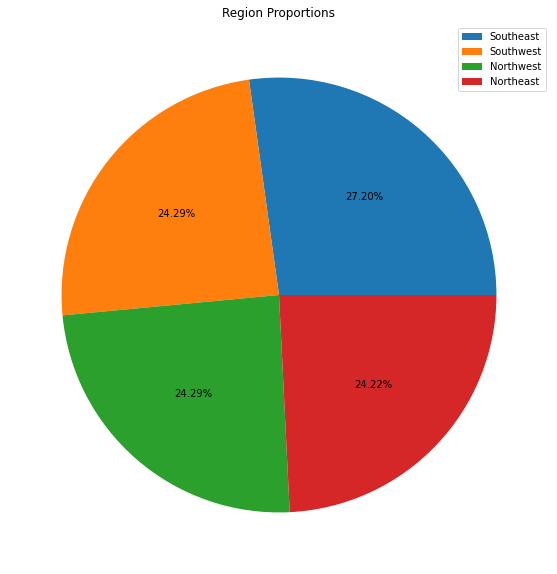

In [26]:
print(df['region'].value_counts()/len(df))

plt.pie(df['region'].value_counts()/len(df),autopct='%0.2f%%',normalize=False)
plt.legend(['Southeast','Southwest','Northwest','Northeast'])
plt.title('Region Proportions')
plt.show()

From the pie chart above, we see that our population was sampled roughly equally across all four regions. Now that we've discovered this, let's move on to the final column, 'charges'.

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


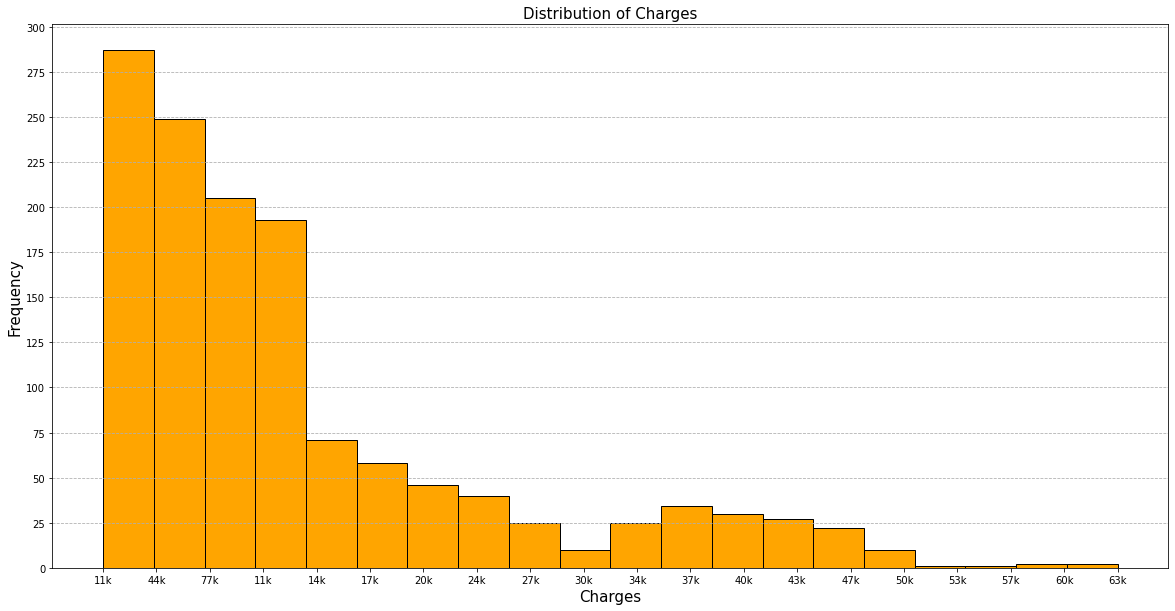

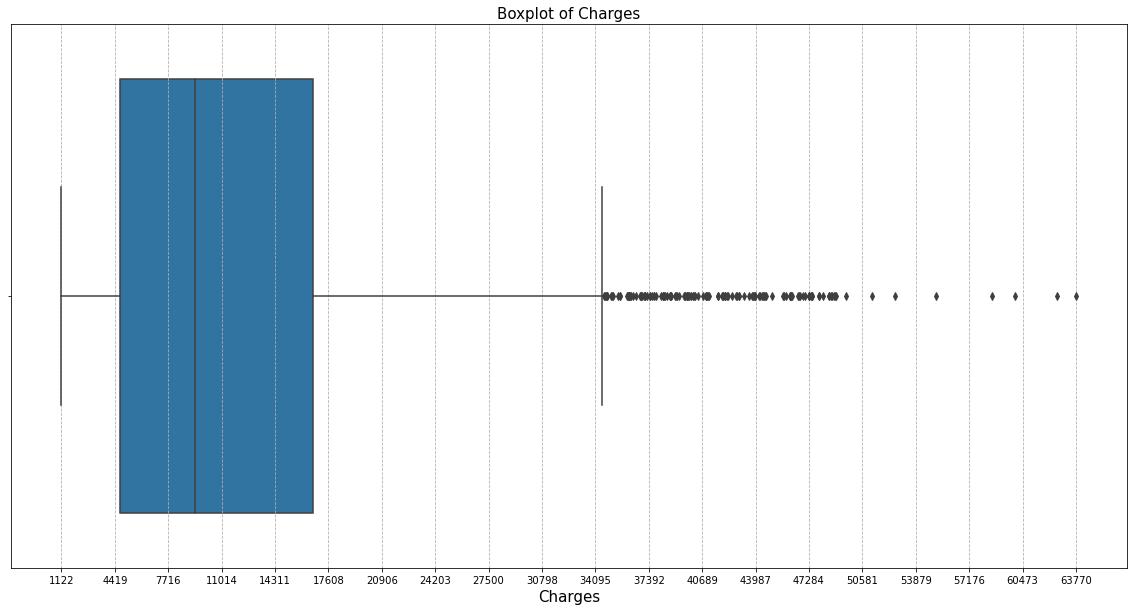

In [27]:
print(df['charges'].describe())

m=df['charges'].min()
M=df['charges'].max()

ax=plt.subplot()
plt.hist(df['charges'],histtype='bar',edgecolor='black',color='orange', bins=20)
plt.xlabel('Charges',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution of Charges',fontsize=15)
plt.grid(axis='y',linestyle='--')
ax.set_yticks(np.arange(0,325,25))
ticks=np.linspace(m,M,20)
labels=[]

for tick in ticks:
    l=str(tick)
    l=l[:2]+'k'
    labels.append(l)

ax.set_xticks(ticks)
ax.set_xticklabels(labels)

plt.show()
plt.clf()

ax2=plt.subplot()
sns.boxplot(data=df,x='charges')
ticks=[np.round(x,2) for x in np.linspace(m,M,20)]
ax2.set_xticks(ticks)
plt.title('Boxplot of Charges',fontsize=15)
plt.xlabel('Charges',fontsize=15)
plt.grid(axis='x',linestyle='--')
plt.show()

From the boxplot above and histogram above, we see that the charges have a very right skew distribution, with a median much less than the mean. 

# Men v.s Women

Now, let's begin to analyze the data, grouped by gender.

In [28]:
men=df[df['sex']=='male']
women=df[df['sex']=='female']

print(men.describe())
print(women.describe())

              age         bmi    children       charges
count  676.000000  676.000000  676.000000    676.000000
mean    38.917160   30.943129    1.115385  13956.751178
std     14.050141    6.140435    1.218986  12971.025915
min     18.000000   15.960000    0.000000   1121.873900
25%     26.000000   26.410000    0.000000   4619.134000
50%     39.000000   30.687500    1.000000   9369.615750
75%     51.000000   34.992500    2.000000  18989.590250
max     64.000000   53.130000    5.000000  62592.873090
              age         bmi    children       charges
count  662.000000  662.000000  662.000000    662.000000
mean    39.503021   30.377749    1.074018  12569.578844
std     14.054223    6.046023    1.192115  11128.703801
min     18.000000   16.815000    0.000000   1607.510100
25%     27.000000   26.125000    0.000000   4885.158700
50%     40.000000   30.107500    1.000000   9412.962500
75%     51.750000   34.313750    2.000000  14454.691825
max     64.000000   48.070000    5.000000  63770

Grouped by sex, the general statistics for each column are negligably different, except charges. Is the mean charge for men higher than the mean charge for women? Or is this difference due to just random chance? Let's investigate further.

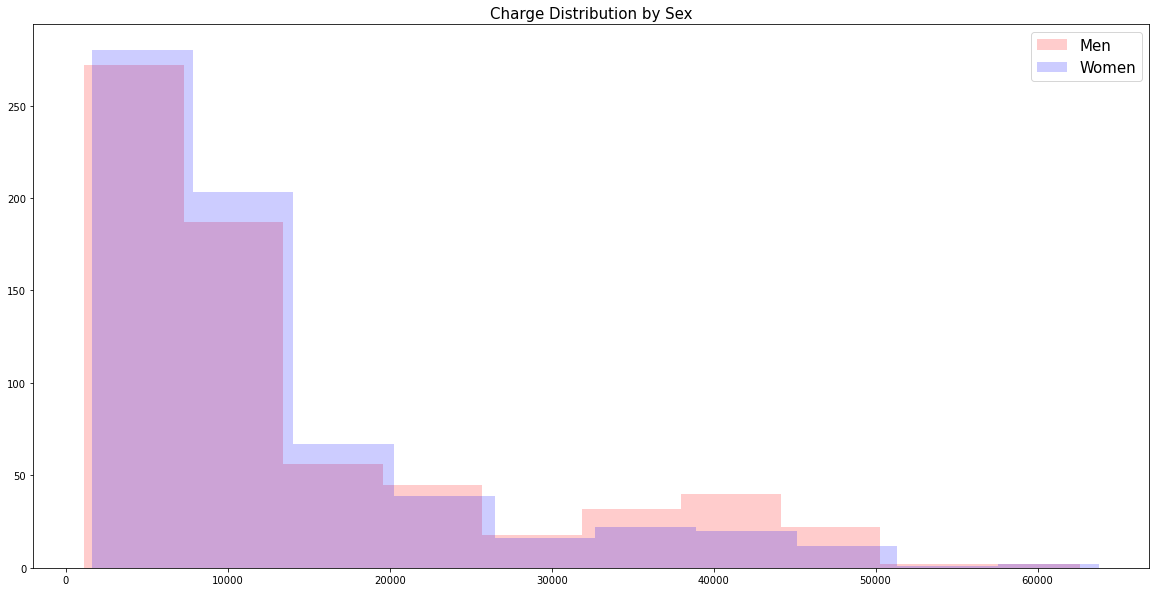

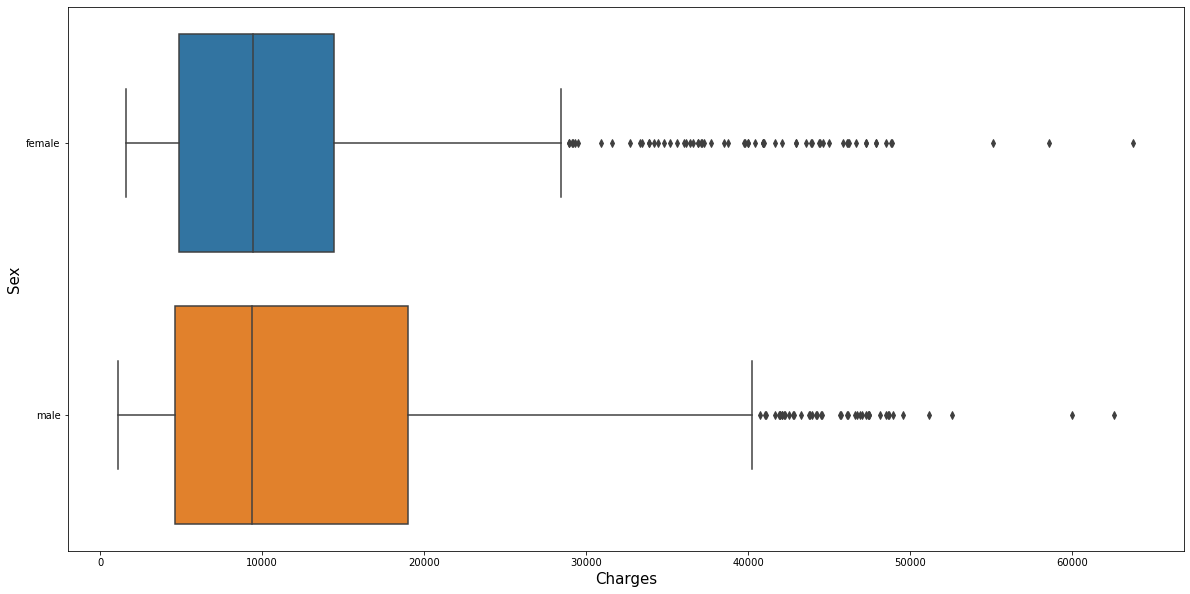

In [29]:
plt.hist(men.charges, histtype='bar', color='red',alpha=0.2)
plt.hist(women.charges, histtype='bar',color='blue',alpha=0.2)
plt.legend(['Men','Women'],prop={'size':15})
plt.title('Charge Distribution by Sex', fontsize=15)
plt.show()
plt.clf()

sns.boxplot(data=df,x='charges',y='sex')
plt.xlabel('Charges',fontsize=15)
plt.ylabel('Sex',fontsize=15)
plt.show()

In the boxplot above, it seems men have a larger IQR for charges. Does this mean anything signficant? Let's do a two-sample hypothesis test to see.

In [30]:
from scipy.stats import ttest_ind

print(ttest_ind(men.charges,women.charges))

Ttest_indResult(statistic=2.097546590051688, pvalue=0.03613272100592976)


From the result above, we obtained a p-value<0.05. Thus we can say with 95% confidence that the average charge for men is greater than the average charge for women. But why? Let's analyze the weight class proportions, grouped by sex. 

In [31]:
print(men.weight_class.value_counts()/len(men))
print(women.weight_class.value_counts()/len(women))

obese          0.556213
overweight     0.275148
healthy        0.156805
underweight    0.011834
Name: weight_class, dtype: float64
obese          0.518127
overweight     0.288520
healthy        0.175227
underweight    0.018127
Name: weight_class, dtype: float64


From the result above, it seems more men in our sample have BMIs in the obese range. But is this difference statistically significant or due just to random chance? Let's perform a two sample proportion test to find out. 

In [32]:
from statsmodels.stats.proportion import test_proportions_2indep
from scipy.stats import chi2_contingency
counts=[men.weight_class.value_counts()[0],women.weight_class.value_counts()[0]]
nobs=[len(men),len(women)]
print(counts)
print(nobs)
print(test_proportions_2indep(counts[0],nobs[0],counts[1],nobs[1],value=0,alternative='larger'))

[376, 343]
[676, 662]
statistic = 1.3958792602295322
pvalue = 0.0813754285424717
compare = diff
method = agresti-caffo
diff = 0.038086129533956625
ratio = 1.0735073403833215
odds_ratio = 1.165636540330418
variance = 0.0007401125398718486
alternative = larger
value = 0
tuple = (1.3958792602295322, 0.0813754285424717)


Here, we obtained a p-value less than 0.1. So we can say with 90 percent confidence that there is a statistically significant difference between rates of obesity between men and women.

But what about other factors?

Let's compare rates of smoking between men and women. 

In [33]:
C=pd.crosstab(df['sex'],df['smoker'])
print(C)
print(chi2_contingency(C))

smoker   no  yes
sex             
female  547  115
male    517  159
(7.39291081459996, 0.006548143503580696, 1, array([[526.43348281, 135.56651719],
       [537.56651719, 138.43348281]]))


From the results above, we see that more men smoke from women in our sample. The p-value we obtained from applying the chi-squared test to the contingency table above is also much less than 0.01. So we can say with 99 percent confidence that men smoke more than women. 

Perhaps this result, along with those of the test before, imply that men tend to have higher rates of obesity and smoking, and that this is why men tend to have higher medical insurance costs. 

Now that we've compared men and women in our data. Let's compare the different regions. 

# Region Comparison

First let's group the data by region. 

In [34]:
SW=df[df['region']=='southwest']
SE=df[df['region']=='southeast']
NW=df[df['region']=='northwest']
NE=df[df['region']=='northeast']
print('Southwest summary:')
print(SW.describe())
print('\n')
print('Southeast summary:')
print(SE.describe())
print('\n')
print('Northwest summary:')
print(NW.describe())
print('\n')
print('Northeast summary:')
print(NE.describe())

Southwest summary:
              age         bmi    children       charges
count  325.000000  325.000000  325.000000    325.000000
mean    39.455385   30.596615    1.141538  12346.937377
std     13.959886    5.691836    1.275952  11557.179101
min     19.000000   17.400000    0.000000   1241.565000
25%     27.000000   26.900000    0.000000   4751.070000
50%     39.000000   30.300000    1.000000   8798.593000
75%     51.000000   34.600000    2.000000  13462.520000
max     64.000000   47.600000    5.000000  52590.829390


Southeast summary:
              age         bmi    children       charges
count  364.000000  364.000000  364.000000    364.000000
mean    38.939560   33.355989    1.049451  14735.411438
std     14.164585    6.477648    1.177276  13971.098589
min     18.000000   19.800000    0.000000   1121.873900
25%     26.750000   28.572500    0.000000   4440.886200
50%     39.000000   33.330000    1.000000   9294.131950
75%     51.000000   37.812500    2.000000  19526.286900
max     

From the tables above, it seems the south east has a much higher mean BMI and medical insurance price. Is this difference statistically signficant? Let's investigate further. 

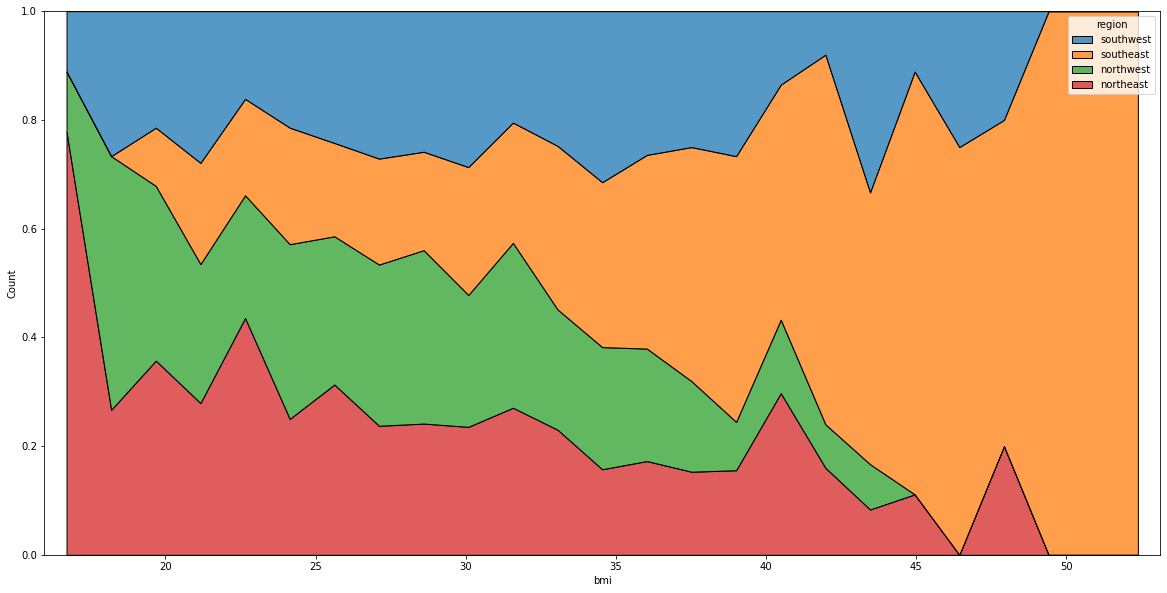

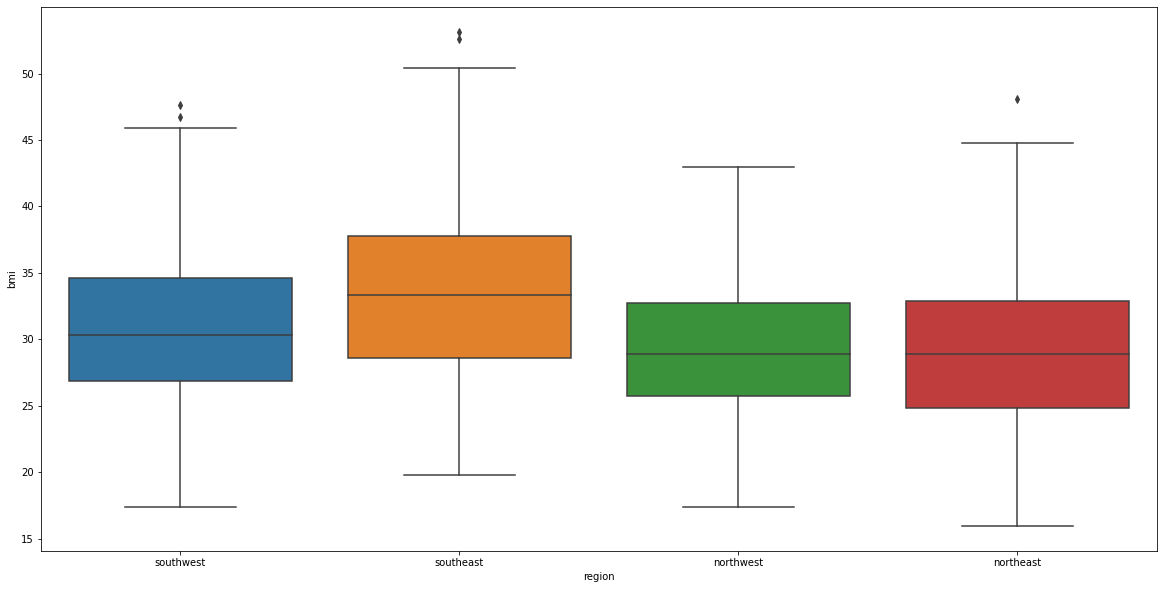

In [35]:
ax1=plt.subplot()
sns.histplot(data=df, x='bmi',hue='region',element='poly',multiple='fill')
plt.show()
plt.clf()

ax2=plt.subplot()
sns.boxplot(data=df,x='region',y='bmi')
plt.show()


From the histograms and boxplots above, we see that the southeast stands out amongst the other regions. To see if there is a statiscally different difference between the mean BMIs, let's perform ANOVA and then Tukey's test. 

In [36]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print('ANOVA result:')
print(f_oneway(SW.bmi,SE.bmi,NW.bmi,NE.bmi))
print('\n')
print('Tukey result:')
print(pairwise_tukeyhsd(df['bmi'],df['region'],0.01))

ANOVA result:
F_onewayResult(statistic=39.49505720170283, pvalue=1.881838913929143e-24)


Tukey result:
   Multiple Comparison of Means - Tukey HSD, FWER=0.01    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263    0.9 -1.4064   1.459  False
northeast southeast   4.1825  0.001  2.7886  5.5764   True
northeast southwest   1.4231 0.0107 -0.0096  2.8558  False
northwest southeast   4.1562  0.001  2.7635   5.549   True
northwest southwest   1.3968 0.0127 -0.0348  2.8285  False
southeast southwest  -2.7594  0.001 -4.1521 -1.3666   True
----------------------------------------------------------


From the results above, we can say with 99 percent confidence that the mean BMI of the southwest is larger than the mean BMI for all the others. We can also say with 95 percent confidence that the mean BMI for the southwest is larger than the mean BMIs for both the northeast and the north west. But what about the mean medical insurance insurance charges? If so, then it might be because BMI and medical insurance costs are correlated? Let's investigate further.  

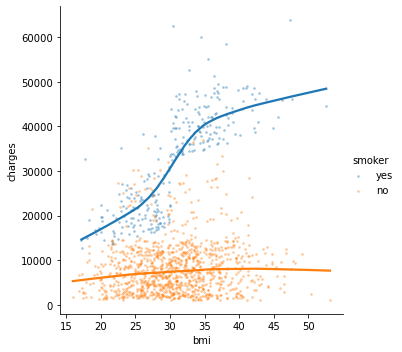

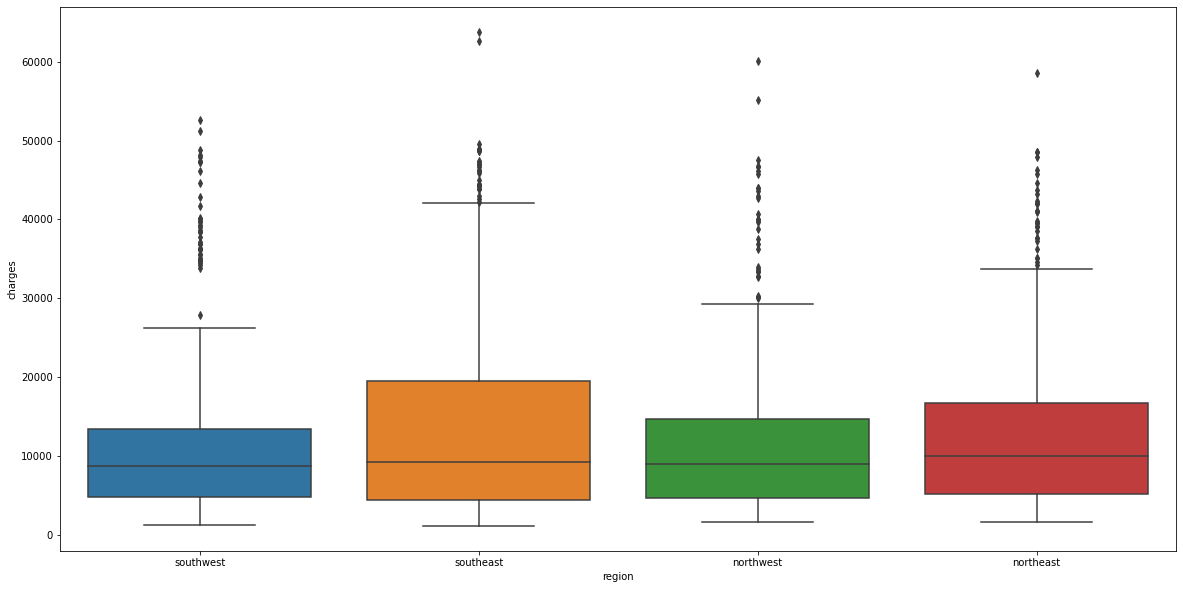

<Figure size 1440x720 with 0 Axes>

In [43]:
sns.lmplot(data=df,x='bmi',y='charges',hue='smoker',lowess=True,scatter_kws={'s':3,'alpha':0.3})
plt.show()
plt.clf()


ax2=plt.subplot()
sns.boxplot(data=df,x='region',y='charges')
plt.show()
plt.clf()

From the scatter plots above, we see that -- for smokers -- BMI seems to be strongly correlated with medical insurance costs. Additionally, from the boxplots below the scatter plots, we see that once more the southeast stands out amongst the other regions. 

What could explain this?

Let's investigate further to find out. 

In [38]:
C=pd.crosstab(df['region'],df['smoker'])
print('Contingency table for smokers grouped by region:')
print(C)

print('\n')

print('chi-squared result:')
print(chi2_contingency(C))

print('\n')

print('Correlation coefficient between bmi and charges for smokers:')
print(df[df['smoker']=='yes'][['bmi','charges']].corr(method='pearson'))

print('\n')

print('ANOVA result:')
print(f_oneway(SW.charges,SE.charges,NW.charges,NE.charges))

print('\n')

print('Tukey result:')
print(pairwise_tukeyhsd(df['bmi'],df['region'],0.05))

Contingency table for smokers grouped by region:
smoker      no  yes
region             
northeast  257   67
northwest  267   58
southeast  273   91
southwest  267   58


chi-squared result:
(7.343477761407071, 0.06171954839170541, 3, array([[257.65022422,  66.34977578],
       [258.44544096,  66.55455904],
       [289.45889387,  74.54110613],
       [258.44544096,  66.55455904]]))


Correlation coefficient between bmi and charges for smokers:
              bmi   charges
bmi      1.000000  0.806481
charges  0.806481  1.000000


ANOVA result:
F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)


Tukey result:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest   0.0263    0.9 -1.1552  1.2078  False
northeast southeast   4.1825  0.001   3.033   5.332   True
northeast southwest   1.4231 0.0107  0.2416  2.6046   True
northwest so

From the contingency table and the results of the chi-squared test above, we can say with 90 percent confidence that people from the southeast tend to smoke more than people from the other regions. From the subsequent table, we also see that -- for smokers -- bmi and medical insurance charges have a strong positive correlation with a correlation coefficient of around 0.8. After it, the results of ANOVA and Tukey's test allow us to say with 95 percent confidence that the mean medical insurance costs of the southern regions are larger than the ones for the northern regions. 

Now that we've analyzed the data grouped by sex, and then by region, let's see whether other variables (like age) are correlated with medical insurance costs. To begin, let's plot a scatterplot of age vs. charges

<Figure size 1152x576 with 0 Axes>

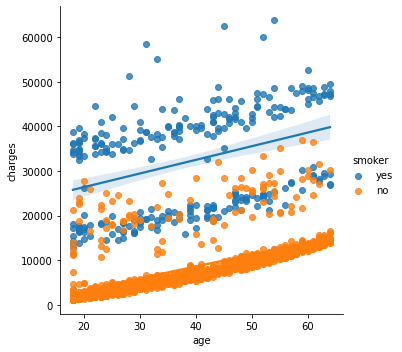

<Figure size 1440x720 with 0 Axes>

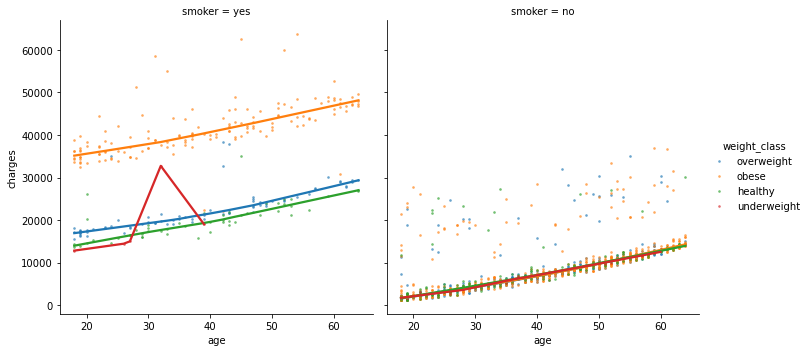

In [76]:
fig=plt.figure(figsize=(16,8))

sns.lmplot(data=df,x='age',y='charges',hue='smoker')

plt.show()
plt.clf()

sns.lmplot(data=df,x='age',y='charges',hue='weight_class',col='smoker',lowess=True,scatter_kws={'s':3,'alpha':0.5})
plt.show()

From the lm-plot above, we see that the data is clearly divided into one cluster of smokers and another of non-smokers, and that for each cluster age appears to have a positive correlation with medical insurance costs. It is also clear that obese people who smoke tend to have the highest medical insurance costs. Let's confirm this by calculating some correlation coefficients. 

In [84]:
print('Correlation coefficient for age vs. charges (smokers):')
print(df[df['smoker']=='yes'][['age','charges']].corr())

print('\n')

print('Correlation coefficient for age vs. charges (smokers):')
print(df[df['smoker']=='no'][['age','charges']].corr())


Correlation coefficient for age vs. charges (smokers):
              age   charges
age      1.000000  0.368224
charges  0.368224  1.000000


Correlation coefficient for age vs. charges (smokers):
              age   charges
age      1.000000  0.627947
charges  0.627947  1.000000
